<div class="alert alert-block alert-info">
<span style="color: rgb(0,53,91);">
<center><img src="./ITESO_Logo.png" style="width:500px;height:142px;" title="Logo ITESO"></center>
<font face = "Times New Roman" size = "6"><b><center>Programacion para Mineria de Datos</center></b></font>
<font face = "Times New Roman" size = "5"><b><center>Preprocesamiento de Datos</center></b></font>

<b><font back = "Times New Roman" size = "4"><center>Unidad 4: </center></font>

<div align="right"><font face = "Times New Roman" size = "2">Mtro. Miguel Tlapa Juarez (migueltlapa@iteso.mx)</font></div>
</span></div>

### Heurística de imputación (recom_imputer)
- Si hay **muchos atípicos** (outliers_% ≥ 5%) o **fuerte asimetría** (|skew| ≥ 1.0) ⇒ usar **median**.
- En otro caso ⇒ usar **mean**.

### Heurística de escalado (recom_scaler)
- Si outliers_% ≥ 5% ⇒ usar **RobustScaler**.
- Si no hay muchos outliers y la distribución es casi simétrica (|skew| ≤ 0.5) ⇒ usar **StandardScaler**.
- En cualquier otro caso ⇒ usar **MinMaxScaler** (por defecto).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# --- Cargar CSV (ajusta la ruta si hace falta) ---
#############################################
#############################################

df = pd.read_csv("datos_processing_integration.csv")

#############################################
#############################################

df.columns

Index(['edad', 'ingreso_mensual', 'talla_cm', 'peso_kg', 'temperatura_c',
       'frecuencia_cardiaca', 'ciudad', 'tipo_servicio', 'nivel',
       'codigo_serie', 'referencia', 'sensor_defectuoso'],
      dtype='object')

In [2]:
df.shape

(120, 12)

In [3]:
df.head()

,edad,ingreso_mensual,talla_cm,peso_kg,temperatura_c,frecuencia_cardiaca,ciudad,tipo_servicio,nivel,codigo_serie,referencia,sensor_defectuoso
0,2.152350,32.363455,73.0,17.0,1344.359160,NaN,A,azul,bajo,NaN,tagD,74.193076
1,7.527457,NaN,610.0,5.0,1034.626809,0.349578,NaN,verde,medio,X,NaN,NaN
2,3.258677,43.865147,421.0,11.0,1301.186344,1.084957,A,rojo,bajo,Z,tagB,NaN
3,4.481654,76.347980,200.0,6.0,1494.730860,0.343660,A,rojo,alto,Z,tagD,NaN
4,NaN,62.913846,307.0,18.0,856.347865,0.543502,A,NaN,medio,Z,tagC,NaN


# Descripcion de Datos Numericos

In [4]:
df.describe()

,edad,ingreso_mensual,talla_cm,peso_kg,temperatura_c,frecuencia_cardiaca,sensor_defectuoso
count,90.000000,97.000000,101.000000,103.000000,98.000000,94.000000,12.000000
mean,4.957169,49.685381,431.643564,14.631068,1222.520024,0.616925,96.604769
std,1.902442,15.501301,213.890326,5.724030,247.276363,0.325108,21.490507
min,1.094274,3.205871,53.000000,5.000000,551.632955,0.065766,71.239586
25%,3.486597,38.849136,268.000000,9.500000,1071.377085,0.367458,80.743819
50%,4.877406,49.765917,445.000000,15.000000,1231.010536,0.583417,94.518452
75%,6.263607,59.465711,594.000000,19.000000,1370.666147,0.915209,104.850883
max,10.236319,87.069702,799.000000,24.000000,1789.884962,1.188695,137.777892


In [5]:
df['edad'].notnull().sum()

np.int64(90)

# Descripcion de Datos Categoricos

In [6]:
df.describe(include='object')

,ciudad,tipo_servicio,nivel,codigo_serie,referencia
count,95,98,98,101,114
unique,3,3,3,3,4
top,A,verde,medio,X,tagA
freq,38,37,42,37,32


# Separacion de la Tabla

In [7]:
X_train, X_test = train_test_split(df, test_size=0.25, random_state=0)

In [8]:
X_train.describe()

,edad,ingreso_mensual,talla_cm,peso_kg,temperatura_c,frecuencia_cardiaca,sensor_defectuoso
count,67.000000,70.000000,79.000000,78.000000,73.000000,68.000000,9.000000
mean,4.760157,49.074526,411.481013,14.628205,1225.470425,0.582948,95.874794
std,1.843649,14.160812,213.029784,5.813350,254.231380,0.314885,18.205434
min,1.094274,18.946902,53.000000,5.000000,551.632955,0.078328,73.906292
25%,3.389168,38.970994,260.500000,9.000000,1089.611100,0.348274,82.927400
50%,4.779163,48.281348,397.000000,15.000000,1225.113411,0.538430,95.994298
75%,6.071081,58.706038,573.500000,19.000000,1376.091400,0.789502,101.297076
max,10.236319,79.632779,799.000000,24.000000,1789.884962,1.177940,129.148400


In [9]:
X_train

,edad,ingreso_mensual,talla_cm,peso_kg,temperatura_c,frecuencia_cardiaca,ciudad,tipo_servicio,nivel,codigo_serie,referencia,sensor_defectuoso
51,5.554967,42.297679,53.0,8.0,1452.875547,0.600556,NaN,azul,NaN,Y,tagC,NaN
113,NaN,NaN,723.0,14.0,NaN,0.531516,A,verde,alto,Z,tagD,NaN
107,6.569949,70.691103,384.0,6.0,1385.362365,1.083380,A,verde,medio,Z,tagD,NaN
61,NaN,48.502087,175.0,24.0,1347.235963,1.177940,NaN,verde,bajo,NaN,tagA,NaN
3,4.481654,76.347980,200.0,6.0,1494.730860,0.343660,A,rojo,alto,Z,tagD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
67,2.690941,33.756910,389.0,23.0,NaN,0.904522,A,azul,NaN,X,tagB,NaN
64,1.719164,52.907140,NaN,15.0,1354.390385,0.642968,NaN,azul,medio,Z,tagB,NaN
117,6.640372,56.084146,321.0,15.0,1190.720332,NaN,A,verde,alto,Z,tagC,NaN
47,7.694156,47.631612,478.0,24.0,1759.584849,NaN,C,verde,medio,Z,tagA,NaN


In [10]:
X_train.to_csv("datos_processing_integration_training.csv",index=True)

# DIAGNOSTICO para la deteccion de Outliers y Bounded_Guess, solamente a la parte de Entrenamiento

Columnas numéricas: ['edad', 'ingreso_mensual', 'talla_cm', 'peso_kg', 'temperatura_c', 'frecuencia_cardiaca', 'sensor_defectuoso']


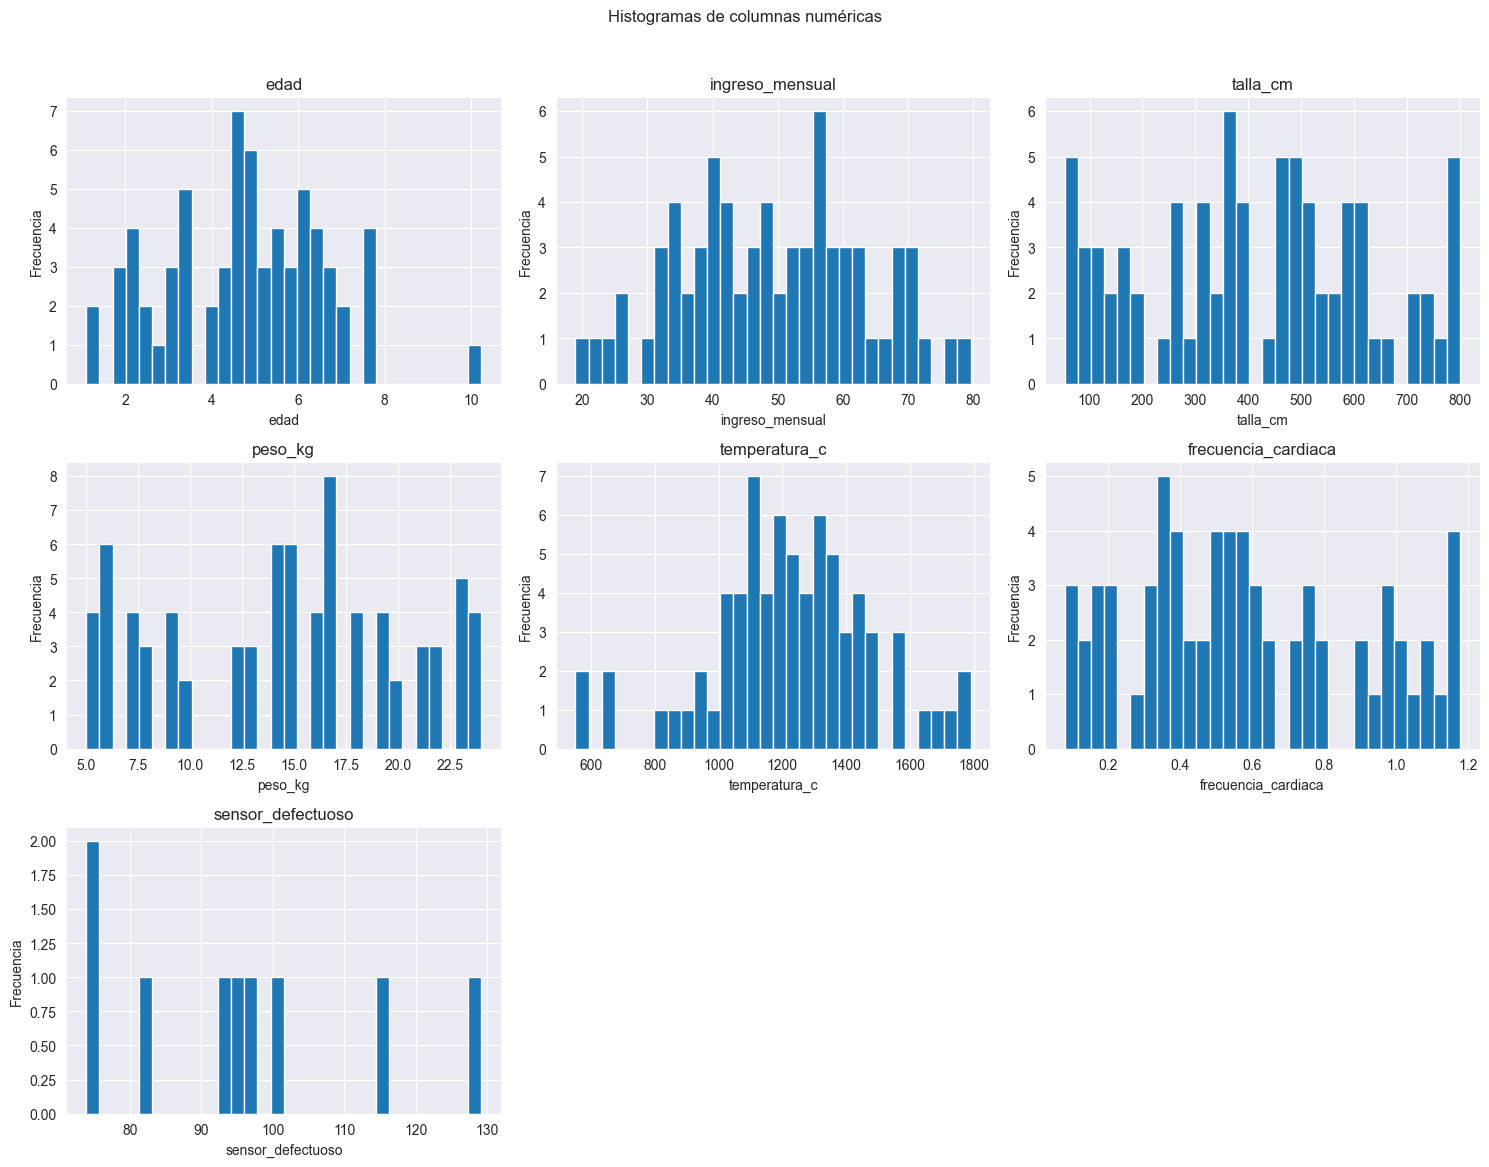

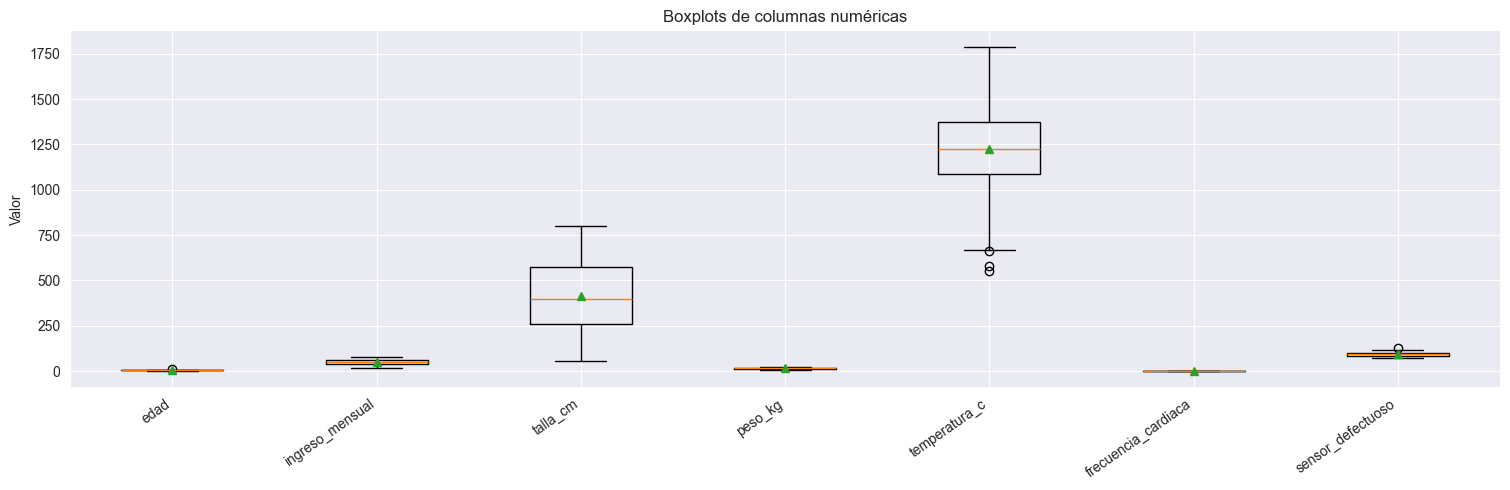

In [11]:
# 1) Separacion de Columnas Numericas
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
print("Columnas numéricas:", num_cols)

# 2) Definicion de Funciones Auxiliares
# Detection de outliers
def iqr_outlier_stats(s: pd.Series):
    s = pd.to_numeric(s, errors="coerce").dropna()
    if s.empty:
        return 0, 0.0, np.nan, np.nan, np.nan, np.nan
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lim_inf, lim_sup = q1 - 1.5*iqr, q3 + 1.5*iqr
    number_outlier_detected = int(((s < lim_inf) | (s > lim_sup)).sum())
    proportion_outliers_respect_total = number_outlier_detected / len(s)

    return number_outlier_detected, proportion_outliers_respect_total, q1, q3, lim_inf, lim_sup

# Detecta si parece estar acotada en [0,1] o [0,100]
def bounded_guess(s: pd.Series):
    s = pd.to_numeric(s, errors="coerce").dropna()
    if s.empty:
        return None
    min_value, max_value = float(s.min()), float(s.max())
    if 0.0 <= min_value and max_value <= 1.0:
        return "[0,1]"
    if 0.0 <= min_value and max_value <= 100.0:
        return "[0,100]"
    return None

if len(num_cols) == 0:
    print("No hay columnas numéricas en X_train.")
else:
    # --------- Figura 1: HISTOGRAMAS (todos en subplots) ----------
    n = len(num_cols)
    ncols = min(3, n)
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 3.8*nrows))
    axes = np.atleast_1d(axes).ravel()
    #Aplico Histograma y Box Plot a la parte de Entrenamiento
    for i, col in enumerate(num_cols):
        s = pd.to_numeric(X_train[col], errors="coerce").dropna()
        ax = axes[i]
        if s.empty:
            ax.text(0.5, 0.5, "Sin datos", ha="center", va="center")
            ax.set_title(col); ax.set_xlabel(col); ax.set_ylabel("Frecuencia")
            ax.set_xticks([]); ax.set_yticks([])
        else:
            ax.hist(s, bins=30)
            ax.set_title(col)
            ax.set_xlabel(col)
            ax.set_ylabel("Frecuencia")

    # Oculta subplots sobrantes
    for j in range(len(num_cols), len(axes)):
        axes[j].axis("off")
    # Guarda Histograma
    fig.suptitle("Histogramas de columnas numéricas", y=1.02, fontsize=12)
    fig.tight_layout()
    fig.savefig("histogramas_numericas.png", dpi=150, bbox_inches="tight")
    plt.show()
    plt.close(fig)

    # --------- Figura 2: BOXPLOTS (todas en un eje) ----------
    series_pairs = []
    for c in num_cols:
        v = pd.to_numeric(X_train[c], errors="coerce").dropna().values
        if v.size > 0:
            series_pairs.append((c, v))

    if len(series_pairs) == 0:
        print("No hay datos numéricos válidos para boxplots. No se genera boxplot.")
        box_path = None
    else:
        labels = [c for c, _ in series_pairs]
        values = [v for _, v in series_pairs]

        fig2 = plt.figure(figsize=(1.6*len(labels)+4, 5))
        plt.boxplot(values, vert=True, showmeans=True)
        plt.xticks(ticks=range(1, len(labels)+1), labels=labels, rotation=35, ha="right")
        plt.ylabel("Valor")
        plt.title("Boxplots de columnas numéricas")
        plt.tight_layout()
        fig2.savefig("boxplots_numericas.png", dpi=150, bbox_inches="tight")
        plt.show()
        plt.close(fig2)


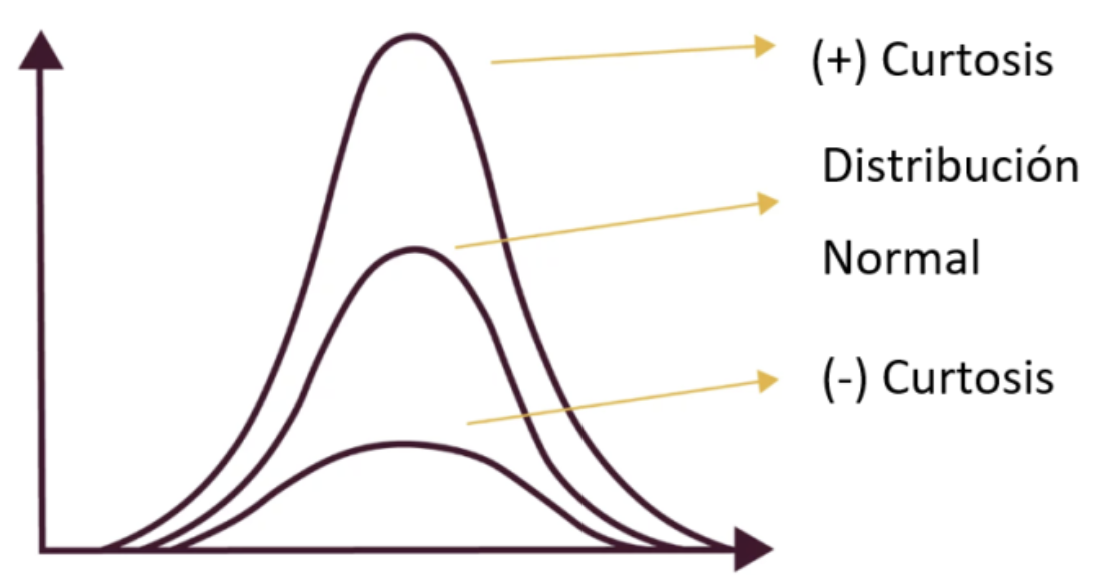

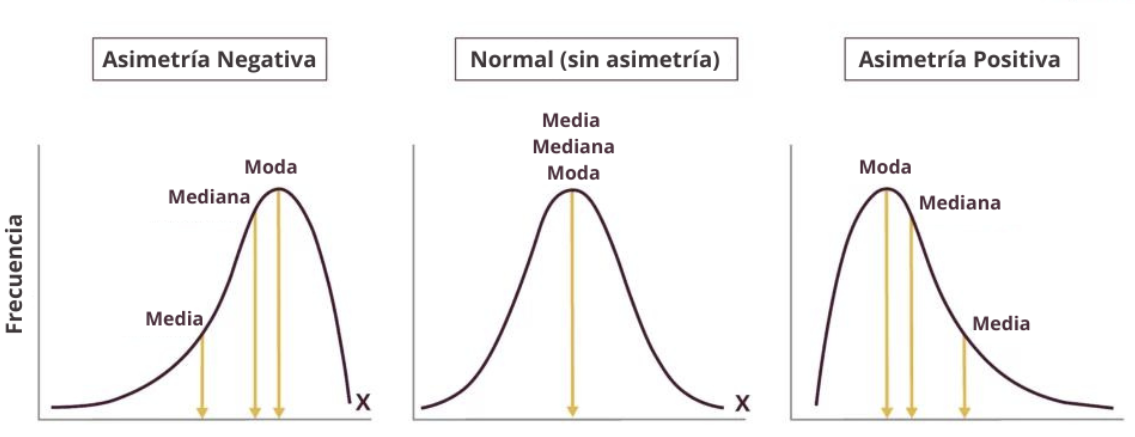

# Diagnostico Numerico + Heuristica

### Heurística de imputación (recom_imputer)
- Si hay **muchos atípicos** (outliers_% ≥ 5%) o **fuerte asimetría** (|skew| ≥ 1.0) ⇒ usar **median**.
- En otro caso ⇒ usar **mean**.

### Heurística de escalado (recom_scaler)
- Si outliers_% ≥ 5% ⇒ usar **RobustScaler**.
- Si no hay muchos outliers y la distribución es casi simétrica (|skew| ≤ 0.5) ⇒ usar **StandardScaler**.
- En cualquier otro caso ⇒ usar **MinMaxScaler** (por defecto).

In [12]:
diagnostico = []
for c in num_cols:
    s = pd.to_numeric(X_train[c], errors="coerce")
    number_outlier_detected, proportion_outliers_respect_total, q1, q3, li, ls = iqr_outlier_stats(s)
    bounds = bounded_guess(s)
    #Calcula el porcentaje de valores faltantes
    miss_pct = s.isna().mean() * 100
    #Elimina valores faltantes
    s_no_na = s.dropna()
    #Calcula la asimetria de la distribucion
    skew = s_no_na.skew() if s_no_na.size > 1 else np.nan
    #Calcula la curtosis
    kurt = s_no_na.kurt() if s_no_na.size > 1 else np.nan

    # Heurística de imputación
    # Verifica que el valor de la asimetria(skew) no sea NaN
    # abs(skew) calcula el valor absoluto de la asimetria
    if (proportion_outliers_respect_total >= 0.05) or (pd.notna(skew) and abs(skew) >= 1.0):
        imputador = "median"
    else:
        imputador = "mean"

    # Heurística de escalado
    if proportion_outliers_respect_total >= 0.05:
        escalador = "RobustScaler"
    elif pd.notna(skew) and abs(skew) <= 0.5:
        escalador = "StandardScaler"
    else:
        escalador = "MinMaxScaler"  # por defecto en casos no normales o acotados

    diagnostico.append({
        "columna": c,
        "missing_%": round(miss_pct, 2),
        "skew": round(skew, 3) if pd.notna(skew) else np.nan,
        "kurtosis": round(kurt, 3) if pd.notna(kurt) else np.nan,
        "outliers_n": number_outlier_detected,
        "outliers_%": round(proportion_outliers_respect_total*100, 2),
        "q1": q1, "q3": q3, "IQR": (q3 - q1),
        "lim_inf": li, "lim_sup": ls,
        "bounded": bounds,
        "recommended_imputer": imputador,
        "recommended_scaler": escalador,
    })

diag_df = pd.DataFrame(diagnostico).sort_values(["outliers_%","missing_%"], ascending=False)
print("\n=== Diagnóstico numérico (heurística) ===\n")
# Aumenta el ancho máximo de columnas impresas
pd.set_option('display.width', 1000)

# Permite mostrar más columnas sin truncar
pd.set_option('display.max_columns', None)

# Muestra más filas si lo necesitas
pd.set_option('display.max_rows', None)

# Reinicar el Indice
diag_df = diag_df.reset_index(drop=True)
# Imprimir DataFrame
print(diag_df)

# Sugerencias para columnas numéricas
suggest_mean_rob = diag_df.query("recommended_imputer=='mean' and recommended_scaler=='RobustScaler'")["columna"].tolist()
suggest_med_rob  = diag_df.query("recommended_imputer=='median' and recommended_scaler=='RobustScaler'")["columna"].tolist()
suggest_med_min  = diag_df.query("recommended_imputer=='median' and recommended_scaler=='MinMaxScaler'")["columna"].tolist()
suggest_med_std  = diag_df.query("recommended_imputer=='median' and recommended_scaler=='StandardScaler'")["columna"].tolist()
suggest_mean_min = diag_df.query("recommended_imputer=='mean' and recommended_scaler=='MinMaxScaler'")["columna"].tolist()
suggest_mean_std = diag_df.query("recommended_imputer=='mean' and recommended_scaler=='StandardScaler'")["columna"].tolist()

print("#"*190)
print("\nSugerencias de columnas numéricas")
print("Imputador + Escalador: Selección de Columnas")
print(f"{'median + Robust':<21}: {suggest_med_rob}")
print(f"{'median + MinMax':<21}: {suggest_med_min}")
print(f"{'median + Standard':<21}: {suggest_med_std}")
print(f"{'mean + Robust':<21}: {suggest_mean_rob}")
print(f"{'mean + MinMax':<21}: {suggest_mean_min}")
print(f"{'mean + Standard':<21}: {suggest_mean_std}")


=== Diagnóstico numérico (heurística) ===

               columna  missing_%   skew  kurtosis  outliers_n  outliers_%           q1           q3         IQR     lim_inf      lim_sup  bounded recommended_imputer recommended_scaler
0    sensor_defectuoso      90.00  0.575    -0.042           1       11.11    82.927400   101.297076   18.369676   55.372885   128.851591     None              median       RobustScaler
1        temperatura_c      18.89 -0.285     0.587           3        4.11  1089.611100  1376.091400  286.480300  659.890650  1805.811851     None                mean     StandardScaler
2                 edad      25.56  0.114    -0.010           1        1.49     3.389168     6.071081    2.681913   -0.633702    10.093951  [0,100]                mean     StandardScaler
3  frecuencia_cardiaca      24.44  0.366    -0.905           0        0.00     0.348274     0.789502    0.441228   -0.313568     1.451344  [0,100]                mean     StandardScaler
4      ingreso_mensual    

# SELECCION DE COLUMNAS NUMERICAS QUE SE LES VA APLICAR IMPUTADOR + ESCALADOR

In [13]:
#########################################################
#########################################################

#num_med_rob_cols = []   # mediana + Robust
#num_med_min_cols = []   # mediana + MinMax
#num_med_std_cols = []   # mediana + Estandar
#num_mean_rob_cols = []  # media + Robust
#num_mean_min_cols = []  # media + MinMax
num_mean_std_cols  = ['temperatura_c', 'edad', 'frecuencia_cardiaca', 'ingreso_mensual', 'peso_kg', 'talla_cm'] # media + Standard
#########################################################
#########################################################
passthrough_cols = ["referencia"]              # pasar sin procesar
drop_cols       = ['sensor_defectuoso']        # eliminar
#########################################################
#########################################################

# SELECCION DE COLUMNAS CATEGORICAS QUE SE LES VA APLICAR EL CODIFICADOR

In [14]:
cat_ohe_cols = ["ciudad","tipo_servicio"]      # moda + OneHot
cat_ord_cols = ["nivel","codigo_serie"]        # moda + Ordinal

# BUSQUEDA DE VALORES UNICOS EN COLUMNAS CATEGORICAS SELECCIONADAS PREVIAMENTE

In [15]:
print(df["nivel"].dropna().unique())

['bajo' 'medio' 'alto']


In [16]:
print(df["codigo_serie"].dropna().unique())

['X' 'Z' 'Y']


In [17]:
# Configuracion del orden de las categorías ordinales selecionadas previamente
categorias_ordinales = [
    ["bajo","medio","alto"],
    ["Z","Y","X"]
 ]


# PIPELINES

In [18]:
# --- Pipelines NUMÉRICOS ---
'''pipe_med_rob = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  RobustScaler())
])'''

'''pipe_med_min = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  MinMaxScaler())
])'''

'''pipe_med_std = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler",  StandardScaler())
])'''


'''pipe_mean_rob = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler",  RobustScaler())
])'''

'''pipe_mean_min = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler",  MinMaxScaler())
])'''

pipe_mean_std = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler",  StandardScaler())
])


In [19]:
# --- Pipelines CATEGÓRICOS ---
pipe_cat_ohe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # moda
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

pipe_cat_ord = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # moda
    ("encoder", OrdinalEncoder(categories=categorias_ordinales,
                               handle_unknown="use_encoded_value", unknown_value=-1))
])

In [20]:
# --- ColumnTransformer unificado ---
preprocessor = ColumnTransformer(
    transformers=[
        #("num_med_rob", pipe_med_rob, num_med_rob_cols),
        #("num_med_min", pipe_med_min, num_med_min_cols),
        #("num_med_std", pipe_med_std, num_med_std_cols),
        #("num_mean_rob",  pipe_mean_rob,  num_mean_rob_cols),
        #("num_mean_min",  pipe_mean_min,  num_mean_min_cols),
        ("num_mean_std",  pipe_mean_std,  num_mean_std_cols),

        # Categóricos 
        ("cat_ohe",      pipe_cat_ohe,  cat_ohe_cols),
        ("cat_ord",      pipe_cat_ord,  cat_ord_cols),

        # Passthrough (sin preprocesar)
        ("passthrough",  "passthrough", passthrough_cols),

        # Drop explícito 
        ("drop_high_na", "drop",        drop_cols),
    ],
    verbose_feature_names_out=False
)

# AJUSTE Y TRANSFORMACION SOLO PARA DATOS DE ENTRENAMIENTO (FUGA DE DATOS)

In [21]:
# ---------- Ajuste y transformación ----------
preprocessor.fit(X_train)

X_train_proc = preprocessor.transform(X_train)
X_test_proc  = preprocessor.transform(X_test)

print("Shape train ->", X_train_proc.shape)
print("Shape test  ->", X_test_proc.shape)


Shape train -> (90, 15)
Shape test  -> (30, 15)


In [22]:
# Reconstruir DataFrame con nombres de columnas
cols_out = preprocessor.get_feature_names_out()
X_train_proc_df = pd.DataFrame(X_train_proc, columns=cols_out)
X_test_proc_df = pd.DataFrame(X_test_proc, columns=cols_out)
X_test_proc_df

,temperatura_c,edad,frecuencia_cardiaca,ingreso_mensual,peso_kg,talla_cm,ciudad_A,ciudad_B,ciudad_C,tipo_servicio_azul,tipo_servicio_rojo,tipo_servicio_verde,nivel,codigo_serie,referencia
0,-0.311094,0.22937,-0.316034,-0.0,0.069144,1.727103,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,tagC
1,-0.245572,0.547635,-1.903599,1.080044,-1.232666,-1.525217,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,tagB
2,0.0,0.073494,0.377402,0.055761,0.999008,0.411048,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,tagD
3,0.925004,0.609295,0.0,1.035557,-0.0,1.832993,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,tagA
4,-0.015082,-0.796453,0.176633,0.932968,-0.0,0.965707,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,tagD
5,-0.539578,1.295714,0.388369,3.06434,0.813035,-0.753737,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,tagC
6,1.728641,0.0,0.094062,3.063958,1.184981,0.577446,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,tagD
7,1.509439,3.125564,-0.550216,-0.928734,1.184981,-0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,tagA
8,-1.070941,0.0,-1.83204,-0.249134,0.441089,1.601044,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,tagB
9,0.0,1.394467,-0.93128,2.01127,0.069144,-0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,tagA


In [23]:
X_train_proc_df

,temperatura_c,edad,frecuencia_cardiaca,ingreso_mensual,peso_kg,talla_cm,ciudad_A,ciudad_B,ciudad_C,tipo_servicio_azul,tipo_servicio_rojo,tipo_servicio_verde,nivel,codigo_serie,referencia
0,1.00006,0.503425,0.06481,-0.546558,-1.232666,-1.807589,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,tagC
1,0.0,0.0,-0.189309,-0.0,-0.116829,1.57079,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,tagD
2,0.703157,1.146304,1.841945,1.743394,-1.604611,-0.138569,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,tagD
3,0.535489,0.0,2.189994,-0.046168,1.742899,-1.192422,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,tagA
4,1.184127,-0.176401,-0.880751,2.199625,-1.604611,-1.066363,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,tagD
5,-0.431707,0.0,0.0,-0.688606,-1.046693,-0.148654,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,tagA
6,0.430215,-1.580778,0.0,-0.0,-0.0,-0.768864,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,tagB
7,0.24417,-0.077972,-0.319959,-0.0,0.255117,-1.767251,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,tagC
8,-0.26882,-0.15788,-1.026194,-1.021693,1.184981,-1.651276,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,tagD
9,-0.829728,0.0,0.0,-0.0,1.370953,-0.88988,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,tagB


In [24]:
X_train_proc_df.to_csv("Entrenamiento_procesado.csv",index=False)
X_test_proc_df.to_csv("Prueba_procesado.csv",index=False)

# ANALISIS DE TABLAS PREPROCESADAS

# Seleccion de Columnas Numericas Escaladas

In [25]:
# num_mean_std_cols  = ['temperatura_c', 'edad', 'frecuencia_cardiaca', 'ingreso_mensual', 'peso_kg', 'talla_cm'] # media + Standard

cols_escaladas_numericas_usuario = ['temperatura_c', 'edad', 'frecuencia_cardiaca', 'ingreso_mensual', 'peso_kg', 'talla_cm',]

In [26]:
cols = [c for c in cols_escaladas_numericas_usuario if c in X_train_proc_df.columns]
print(f"Columnas escaladas encontradas en X_train_proc_df: {cols}")

if len(cols) == 0:
    print("No hay columnas escaladas válidas en X_train_proc_df. No se generan imágenes.")
else:
    # ---------- Figura 1: HISTOGRAMAS (todas en subplots) ----------
    n = len(cols)
    ncols = min(3, n)
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 3.8*nrows))
    axes = np.atleast_1d(axes).ravel()

    for i, col in enumerate(cols):
        s = pd.to_numeric(X_train_proc_df[col], errors="coerce").dropna()
        ax = axes[i]
        if s.empty:
            ax.text(0.5, 0.5, "Sin datos", ha="center", va="center")
            ax.set_title(col); ax.set_xlabel(col); ax.set_ylabel("Frecuencia")
            ax.set_xticks([]); ax.set_yticks([])
        else:
            ax.hist(s, bins=30)
            ax.set_title(col)
            ax.set_xlabel(col)
            ax.set_ylabel("Frecuencia")

    # Ocultar subplots sobrantes
    for j in range(len(cols), len(axes)):
        axes[j].axis("off")

    fig.suptitle("Histogramas (columnas escaladas)", y=1.02, fontsize=12)
    fig.tight_layout()
    hist_file = "scaled_histogramas.png"
    fig.savefig(hist_file, dpi=150, bbox_inches="tight")
    plt.close(fig)

    # ---------- Figura 2: BOXPLOTS (todas en un solo eje) ----------
    series_pairs = []
    for c in cols:
        v = pd.to_numeric(X_train_proc_df[c], errors="coerce").dropna().values
        if v.size > 0:
            series_pairs.append((c, v))

    if len(series_pairs) == 0:
        print("No hay datos válidos para boxplots. No se genera boxplot.")
        box_file = None
    else:
        labels = [c for c, _ in series_pairs]
        values = [v for _, v in series_pairs]

        fig2 = plt.figure(figsize=(1.6*len(labels)+4, 5))
        plt.boxplot(values, vert=True, showmeans=True)
        plt.xticks(ticks=range(1, len(labels)+1), labels=labels, rotation=35, ha="right")
        plt.ylabel("Valor")
        plt.title("Boxplots (columnas escaladas)")
        plt.tight_layout()
        box_file = "scaled_boxplots.png"
        fig2.savefig(box_file, dpi=150, bbox_inches="tight")
        plt.close(fig2)

    print("Imágenes guardadas:")
    print(" -", hist_file)
    if box_file: print(" -", box_file)


Columnas escaladas encontradas en X_train_proc_df: ['temperatura_c', 'edad', 'frecuencia_cardiaca', 'ingreso_mensual', 'peso_kg', 'talla_cm']
Imágenes guardadas:
 - scaled_histogramas.png
 - scaled_boxplots.png
